In [9]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
x = df.drop('math score',axis=1)

In [11]:
y = df['math score']

In [12]:
numerical = x.select_dtypes(exclude='object').columns
catergorical = x.select_dtypes(include='object').columns

In [18]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# A tool that allows you to apply different preprocessing and feature extraction pipelines to different subsets of features (columns) within your dataset. 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [14]:
scaler = StandardScaler()
onehot = OneHotEncoder()

preprocessor = ColumnTransformer(
    [   
        ("OneHotEncoder",onehot,catergorical),
        ('StandardScaler',scaler,numerical),
    ]
)

In [15]:
x = preprocessor.fit_transform(x)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression(fit_intercept=True)
model = model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
score = r2_score(ytest,ypred)*100
print("Accuracy of model is {}".format(round(score,2)))

Accuracy of model is 88.04


Text(0, 0.5, 'Predicted')

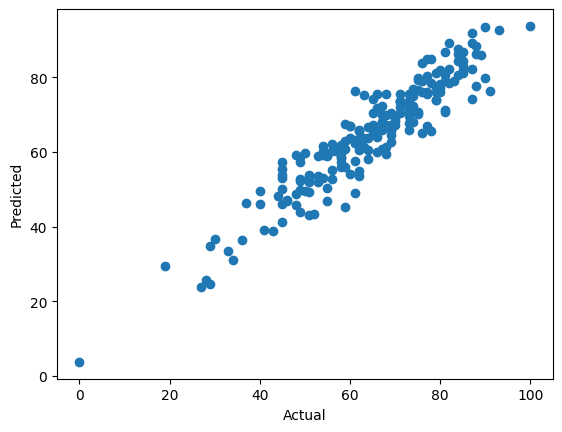

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.scatter(ytest,ypred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

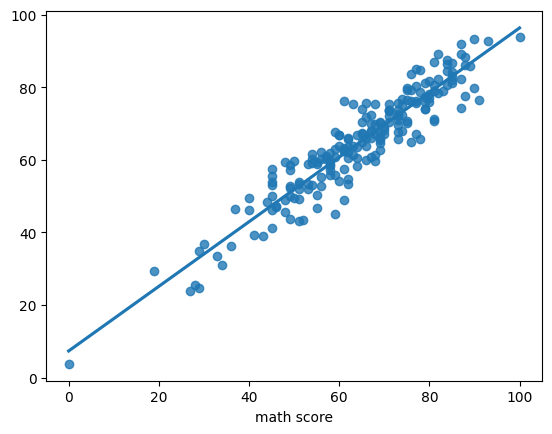

In [47]:
sns.regplot(x=ytest,y=ypred,ci=None)